In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---

- ## 산모의 흡연 여부와 아기의 출생 체중과의 연관

<br>

In [2]:
births = Table.read_table("./csv/baby.csv")
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


- ### 흡연 여부, 출생 체중만 추출

In [5]:
smoking_and_birth_weight = births.select("Maternal Smoker", "Birth Weight")
smoking_and_birth_weight.show(3)

Maternal Smoker,Birth Weight
False,120
False,113
True,128


- ### 흡연 여부를 그룹으로 하는 체중 분포 히스토그램

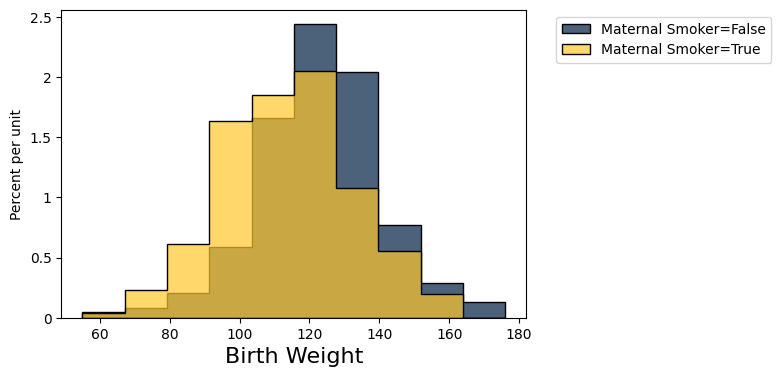

In [6]:
smoking_and_birth_weight.hist("Birth Weight", group="Maternal Smoker")

- <h4 style="font-weight:bold; color:red;">흡연 산모 아기의 체중이 평균적으로 낮게 나타남</h4>

<br><br>

- <h3 style="font-weight:bold; color:red;">모집단에서는 차이가 없지만, 표본에서만 차이가 존재할 수 있음</h3>

    - #### 귀무가설: 모집단에서는 차이가 없음
    - #### 대립 가설: 모집단에서도 차이가 있음

- ### 무작위 순열
    - #### 모집단에서 차이가 없다면, 흡연 여부가 평균에 영향을 주지 않아야 함
    - #### 산모의 모든 레이블을 무작위로 섞은 다음 체중 평균의 차이를 구해보기
    - <h4 style="font-weight: bold; color: red">흡연 여부를 무작위로 섞은 체중의 평균 차이도 표본과 유사하게 나타난다면 귀무가설 채택</h4>

<br>

- #### 흡연 그룹 평균과 비흡연 그룹 평균의 차이를 계산하는 함수

In [7]:
def difference_of_means(table, group_label):
    reduced = table.select("Birth Weight", group_label)
    means_table = reduced.group(group_label, np.mean)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

difference_of_means(smoking_and_birth_weight, "Maternal Smoker")

-9.266142572024918

- #### 흡연 여부를 셔플로 섞기
    - #### table.sample(with_replacement=False)

In [13]:
shuffled_labels = smoking_and_birth_weight.sample(with_replacement=False).column(0)
original_and_shuffled = smoking_and_birth_weight.with_column("Shuffled Label", shuffled_labels)
original_and_shuffled.show(3)

Maternal Smoker,Birth Weight,Shuffled Label
False,120,True
False,113,True
True,128,False


- #### 셔플로 섞은 그룹의 평균의 차이

In [16]:
shuffled_group_means = original_and_shuffled.select("Shuffled Label", "Birth Weight").group("Shuffled Label", np.mean)
shuffled_group_means

Shuffled Label,Birth Weight mean
False,118.754
True,120.566


In [19]:
difference_of_means(original_and_shuffled, "Shuffled Label")

1.8126026478967674

<br>

- ### 5000번 시뮬레이션 한 결과

In [21]:
def one_simulated_difference_of_means():
    shuffled_labels = smoking_and_birth_weight.sample(with_replacement=False).column(0)
    original_and_shuffled = smoking_and_birth_weight.with_column("Shuffled Label", shuffled_labels)
    return difference_of_means(original_and_shuffled, "Shuffled Label")

differences = make_array()
for _ in range(5000):
    differences = np.append(differences, one_simulated_difference_of_means())
differences

array([ 0.68934595,  0.72511845,  0.59633743, ..., -1.28171915,
        0.98625775,  1.06853452])

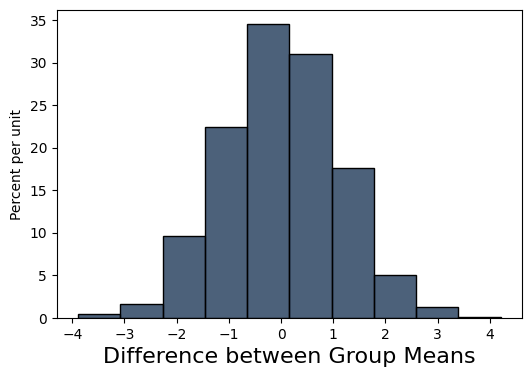

In [23]:
Table().with_column("Difference between Group Means", differences).hist()

- ### 평균 차이가 0에 가깝게 나타남
    - #### 귀무가설은 표본의 평균 차이와 모집단의 평균 차이가 같게 나타나는 것이지만, 표본의 평균 차이는 거의 나타나지 않았음
    - <h4 style="font-weight: bold; color: red">대립가설을 채택</h4>

---